<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#import" data-toc-modified-id="import-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>import</a></span></li><li><span><a href="#Sampling" data-toc-modified-id="Sampling-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Sampling</a></span></li><li><span><a href="#Add-data-to-the-sampling" data-toc-modified-id="Add-data-to-the-sampling-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Add data to the sampling</a></span></li><li><span><a href="#Result" data-toc-modified-id="Result-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Result</a></span><ul class="toc-item"><li><span><a href="#lambda" data-toc-modified-id="lambda-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>lambda</a></span></li><li><span><a href="#cost" data-toc-modified-id="cost-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>cost</a></span></li></ul></li></ul></div>

# import

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from smt.sampling_methods import LHS
%matplotlib notebook
from scipy.spatial.distance import cdist
from smt.sampling_methods import LHS
import glob
from scipy.interpolate import griddata
import re
from numpy import genfromtxt

# Sampling

(20, 3)
[[6.2500375e-06 8.2500175e+06 2.7500725e+07]
 [6.7500325e-06 7.7500225e+06 6.2500375e+07]
 [1.2500875e-06 2.7500725e+06 6.7500325e+07]
 [2.5009750e-07 3.7500625e+06 1.2500875e+07]
 [7.5009250e-07 1.7500825e+06 8.2500175e+07]
 [2.7500725e-06 2.2500775e+06 5.7500425e+07]
 [1.7500825e-06 4.7500525e+06 4.2500575e+07]
 [8.2500175e-06 7.2500275e+06 9.7500025e+07]
 [4.2500575e-06 9.2500075e+06 7.2500275e+07]
 [5.7500425e-06 9.7500025e+06 9.2500075e+07]
 [8.7500125e-06 8.7500125e+06 2.5009750e+06]
 [4.7500525e-06 4.2500575e+06 1.7500825e+07]
 [3.7500625e-06 6.2500375e+06 3.2500675e+07]
 [9.7500025e-06 5.7500425e+06 7.7500225e+07]
 [7.2500275e-06 5.2500475e+06 7.5009250e+06]
 [7.7500225e-06 2.5009750e+05 4.7500525e+07]
 [5.2500475e-06 1.2500875e+06 2.2500775e+07]
 [2.2500775e-06 6.7500325e+06 5.2500475e+07]
 [9.2500075e-06 7.5009250e+05 8.7500125e+07]
 [3.2500675e-06 3.2500675e+06 3.7500625e+07]]


<IPython.core.display.Javascript object>


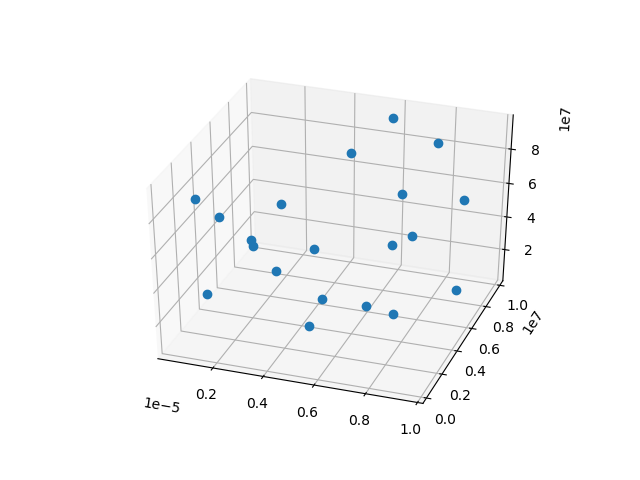

In [3]:
# a=[10**-8.0, 10**-5.0]
# z=[10**2.0, 10**7.0]
# e=[10**4.0, 10**7.0]

a=[10**-8.0, 10**-5.0] # 1.26e-5
z=[10**2.0, 10**7.0] # 4.07e4
e=[10**4.0, 10**7.0] # 5.24e5
xlimits = np.array([a, z,e])
sampling = LHS(xlimits=xlimits)#,criterion='ese')

num = 20
x = sampling(num)

print(x.shape)
print(x)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot(x[:, 0],x[:, 1],x[:,2], "o")
ax.set_xlim(a)
ax.ticklabel_format(axis='both',style='sci',scilimits=(0,2))

plt.show()

# Add data to the sampling

In [38]:


lambda1 = np.array([[0,0,0],
                    [7.075e-07, 1.225e+03, 7.075e+05],
                    [1.225e-07, 6.175e+03, 7.975e+05],
                    [2.125e-07, 6.625e+03, 9.775e+05],
                    [9.775e-07, 5.725e+03, 5.275e+05],
                    [3.475e-07, 4.825e+03, 4.825e+05],
                    [8.425e-07, 7.525e+03, 2.125e+05],
                    [9.325e-07, 7.975e+03, 6.175e+05],
                    [4.825e-07, 8.425e+03, 7.525e+05],
                    [4.375e-07, 5.275e+03, 2.575e+05],
                    [7.525e-07, 2.125e+03, 6.625e+05],
                    [3.925e-07, 3.925e+03, 4.375e+05],
                    [2.575e-07, 3.475e+03, 1.675e+05],
                    [6.175e-07, 2.575e+03, 3.025e+05],
                    [3.025e-07, 1.675e+03, 3.925e+05],
                    [7.975e-07, 9.325e+03, 3.475e+05],
                    [5.275e-07, 8.875e+03, 8.875e+05],
                    [1.675e-07, 3.025e+03, 5.725e+05],
                    [8.875e-07, 9.775e+03, 1.225e+05],
                    [5.725e-07, 7.075e+03, 8.425e+05],
                    [6.625e-07, 4.375e+03, 9.325e+05],
                    [5.72223526e-08,8.21716373e+02,4.34371288e+04],
                    [1.09207624e-08,3.59826742e+03,2.31673994e+04],
                    [2.52019239e-08,1.42787738e+02,3.58278837e+04],
                    [4.38538165e-06,2.52370728e+02,7.39478862e+04],
                    [1.16042602e-07,1.27369219e+04,8.35691778e+06],
                    [8.79311898e-06,3.37947380e+02,6.11719366e+05],
                    [1.08307993e-06,4.55010579e+04,1.57103119e+04],
                    [1.73412810e-07,1.20448089e+02,5.50520536e+04],
                    [1.35630556e-08,1.03647064e+04,1.82693082e+05],
                    [5.41436754e-08,3.25357149e+02,9.21650604e+06],
                    [4.55567975e-07,1.19409292e+03,1.94556253e+04],
                    [6.40401602e-07,1.07818246e+02,2.52422289e+06],
                    [1.49706583e-08,4.62727511e+02,2.93465174e+05],
                    [2.55562919e-06,6.56499589e+02,1.07541097e+04],
                    [2.31425688e-08,3.05713732e+04,1.29871960e+04],
                    [2.60580866e-07,9.49924963e+04,2.22408108e+06],
                    [9.70838441e-08,2.18564680e+02,9.04193338e+05],
                    [1.84334523e-08,1.08264023e+04,6.55096021e+06],
                    [3.82648474e-08,6.25034274e+04,9.28779410e+04],
                    [7.28013770e-06,5.10448444e+03,2.89884163e+04]])


class addLHS(object):
    def __init__(self, nlevel, xlimits, firstlhs):
        """
        Constructor where values of options can be passed in.
        Parameters
        ----------
        nlevel : integer.
            The number of design of experiments to be built
        xlimits : ndarray
            The interval of the domain in each dimension with shape (nx, 2)
        """
        self.nlevel = nlevel
        self.xlimits = xlimits
        self.firstlhs = firstlhs
        


    def __call__(self,nb_samples_hifi):
        """
        Builds nlevel nested design of experiments of dimension dim and size n_samples.
        Each doe sis built with the optmized lhs procedure.
        Builds the highest level first; nested properties are ensured by deleting
        the nearest neighbours in lower levels of fidelity.
        Parameters
        ----------
        nb_samples_hifi: The number of samples of the highest fidelity model.
            nb_samples_fi(n-1) = 2 * nb_samples_fi(n)
        Returns
        ------
        list of length nlevel of design of experiemnts from low to high fidelity level.
        """
        x=self.xlimits[0,:]
        y=self.xlimits[1,:]
        z=self.xlimits[2,:]
        
        ind=[]
        for i in self.firstlhs:
            if not x[0]<=i[0]<=x[1]:
                ind.append(int(np.where( self.firstlhs[:,0]==i[0])[0]))
#                 print('x',ind)
            else:
                if not y[0]<=i[1]<=y[1]:
                    print()
                    ind.append(int(np.where( self.firstlhs[:,1]==i[1])[0]))
#                     print('y',ind)
                else:
                    if not z[0]<=i[2]<=z[1]:
                        ind.append(int(np.where( self.firstlhs[:,2]==i[2])[0]))
#                         print('z',ind)
        
#         self.firstlhs=np.delete(self.firstlhs,ind,0)
        nb=len(self.firstlhs)
        nt = []
        if nb==0:
            print('len(self.firstlhs)==0')
            for i in range(self.nlevel, 0, -1):
                nt.append(pow(2, i - 1) * nb_samples_hifi)
        else:
            for i in range(self.nlevel, 0, -1):
                nt.append(pow(2, i - 1) * len(self.firstlhs))

        if len(nt) != self.nlevel:
            raise ValueError("nt must be a list of nlevel elements")
        if np.allclose(np.sort(nt)[::-1], nt) == False:
            raise ValueError("nt must be a list of decreasing integers")
        doe = []
        p0 = LHS(xlimits=self.xlimits, criterion="ese")
        doe.append(p0(nt[0]))
        for i in range(1, self.nlevel):
            p = LHS(xlimits=self.xlimits, criterion="ese")
            doe.append(p(nt[i]))
        doe[-1]=self.firstlhs
        for i in range(1, self.nlevel)[::-1]:
            ind = []
            d = cdist(doe[i], doe[i - 1], "euclidean")
            for j in range(doe[i].shape[0]):
                dj = np.sort(d[j, :])
                k = dj[0]
                l = (np.where(d[j, :] == k))[0][0]
                m = 0
                while l in ind:
                    m = m + 1
                    k = dj[m]
                    l = (np.where(d[j, :] == k))[0][0]
                ind.append(l)
                
            doe[i - 1] = np.delete(doe[i - 1], ind, axis=0)
            doe[i - 1] = np.vstack((doe[i],doe[i - 1]))
        return doe,nb


xdoes = addLHS(nlevel=4, xlimits=np.log10(xlimits),firstlhs=np.log10(lambda1))
doe,nb=xdoes(40) #argument est la longueur de lambda1
x1,x2,x3,x4=doe

/home/urrutyb/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:138: RuntimeWarning: divide by zero encountered in log10


In [39]:
print(10**x3)

np.savetxt('tmp.txt',10**x3,fmt='%10.3e')

[[0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [7.07500000e-07 1.22500000e+03 7.07500000e+05]
 [1.22500000e-07 6.17500000e+03 7.97500000e+05]
 [2.12500000e-07 6.62500000e+03 9.77500000e+05]
 [9.77500000e-07 5.72500000e+03 5.27500000e+05]
 [3.47500000e-07 4.82500000e+03 4.82500000e+05]
 [8.42500000e-07 7.52500000e+03 2.12500000e+05]
 [9.32500000e-07 7.97500000e+03 6.17500000e+05]
 [4.82500000e-07 8.42500000e+03 7.52500000e+05]
 [4.37500000e-07 5.27500000e+03 2.57500000e+05]
 [7.52500000e-07 2.12500000e+03 6.62500000e+05]
 [3.92500000e-07 3.92500000e+03 4.37500000e+05]
 [2.57500000e-07 3.47500000e+03 1.67500000e+05]
 [6.17500000e-07 2.57500000e+03 3.02500000e+05]
 [3.02500000e-07 1.67500000e+03 3.92500000e+05]
 [7.97500000e-07 9.32500000e+03 3.47500000e+05]
 [5.27500000e-07 8.87500000e+03 8.87500000e+05]
 [1.67500000e-07 3.02500000e+03 5.72500000e+05]
 [8.87500000e-07 9.77500000e+03 1.22500000e+05]
 [5.72500000e-07 7.07500000e+03 8.42500000e+05]
 [6.62500000e-07 4.37500000e+03 9.325000

<IPython.core.display.Javascript object>


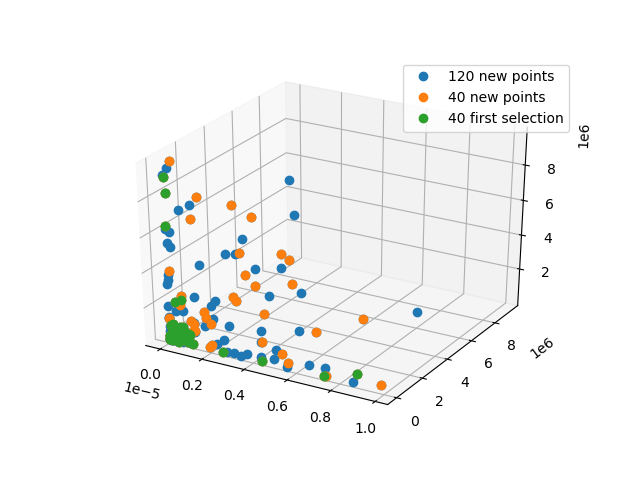

<IPython.core.display.Javascript object>


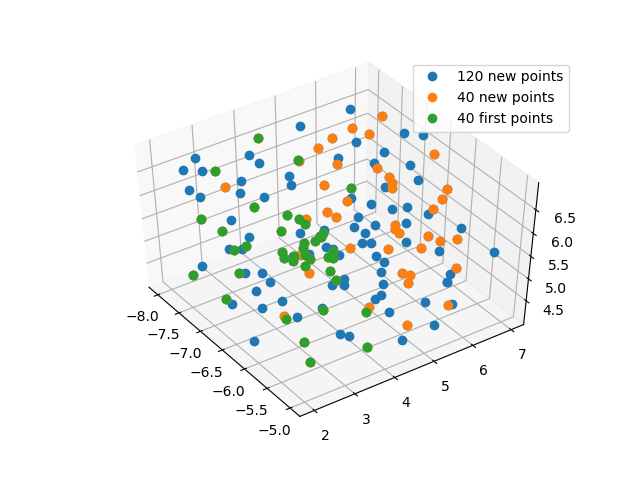

In [17]:
# print(len(x1),len(x2),len(x3), len(x4))
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# ax.plot(10**x1[:, 0],10**x1[:, 1],10**x1[:,2], "o",label=str(nb*7) + ' new points')
ax.plot(10**x2[:, 0],10**x2[:, 1],10**x2[:,2], "o",label=str(nb*3) + ' new points')
ax.plot(10**x3[:, 0],10**x3[:, 1],10**x3[:,2], "o",label=str(nb) + ' new points')
ax.plot(10**x4[:, 0],10**x4[:, 1],10**x4[:,2], "o",label=str(nb)+ ' first selection')

ax.ticklabel_format(axis='both',style='sci',scilimits=(0,2))
plt.legend()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# ax.plot(x1[:, 0],x1[:, 1],x1[:,2], "o",label=str(nb*7) + ' new points')
ax.plot(x2[:, 0],x2[:, 1],x2[:,2], "o",label=str(nb*3) + ' new points')
ax.plot(x3[:, 0],x3[:, 1],x3[:,2], "o",label=str(nb) + ' new points')
ax.plot(x4[:, 0],x4[:, 1],x4[:,2], "o",label=str(nb)+' first points')
plt.legend()
ax.ticklabel_format(axis='both',style='sci',scilimits=(0,2))

# xdoes = addLHS(nlevel=4, xlimits=xlimits,firstlhs=lambda1)
# doe,nb=xdoes(20) 
# x1,x2,x3,x4=doe
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')

# ax.plot(x1[:, 0],x1[:, 1],x1[:,2], "o",label=str(nb*7) + ' new points')
# ax.plot(x2[:, 0],x2[:, 1],x2[:,2], "o",label=str(nb*3) + ' new points')
# ax.plot(x3[:, 0],x3[:, 1],x3[:,2], "o",label=str(nb) + ' new points')
# ax.plot(x4[:, 0],x4[:, 1],x4[:,2], "o",label=str(nb)+' first selection')
# ax.ticklabel_format(axis='both',style='sci',scilimits=(0,2))

# plt.legend()


# plt.show()

# Result

In [4]:
def sort_human(l):
    def convert(text): return float(text) if text.isdigit() else text
    def alphanum(key): return [convert(c)
                               for c in re.split('([-+]?[0-9]*\.?[0-9]*)', key)]
    l.sort(key=alphanum)
    return l


size = 20
params = {'legend.fontsize': 'large',
          #           'figure.figsize': (20,8),
          'axes.labelsize': size,
          'axes.titlesize': size,
          'xtick.labelsize': size*0.75,
          'ytick.labelsize': size*0.75,
          'axes.titlepad': 25}
plt.rcParams.update(params)
url = '/home/urrutyb/occigen/TiPACCS/inversion_Ronnie/step_3_inversion/OPTIM_MUMPS_R*/'
#url = '/home/urrutyb/Documents/PhD_TiPACCS/inversion/inversion_Ronnie/step_3_inversion/OPTIM_MUMPS_R*/'

lambda1 = genfromtxt(
    '/home/urrutyb/occigen/TiPACCS/inversion_Ronnie/step_3_inversion/LREG_avecDHDt_avecVisco.IN', delimiter=' ')[1:, :]


n = sort_human(glob.glob(url + "Cost_R*.dat"))[1:]
# print(n)
RMS = np.zeros(len(n))
cost = np.zeros(len(n))
for i in range(len(n)):
    RMS[i] = np.loadtxt(n[i], unpack=True)[2, -1]
    cost[i] = np.loadtxt(n[i], unpack=True)[1, -1]
print('RMS=', RMS)
print('cost=', cost)


n = sort_human(glob.glob(url + "Cost_dHdt_R*.dat"))[1:]
# print(n)
dhdt = np.zeros(len(n))
for i in range(len(n)):
    dhdt[i] = np.loadtxt(n[i], unpack=True)[1, -1]
print('J_div=', dhdt)

n = sort_human(glob.glob(url + "CostRegEta_R*.dat"))[1:]
# print(n)
eta = np.zeros(len(n))
for i in range(len(n)):
    eta[i] = np.loadtxt(n[i], unpack=True)[1, -1]
print('J_eta=', eta)

n = sort_human(glob.glob(url + "CostRegBeta_R*.dat"))[1:]
# print(n)
beta = np.zeros(len(n))
for i in range(len(n)):
    beta[i] = np.loadtxt(n[i], unpack=True)[1, -1]
print('J_beta=', beta)

Jtot = cost+lambda1[:, 0]*dhdt+lambda1[:, 2]*eta+lambda1[:, 1]*beta
print('Jtot=', Jtot)

RMS= [ 7.1218167  7.199204   7.3363717  6.95399    6.9074146  6.4598534
  7.0420568  7.1873982  6.5247839  7.0692962  6.8251229  6.3105629
  6.6361678  6.7249118  6.7420278  7.2838335  6.9752889  6.2088772
  7.2585705  7.2864063  5.8709039  5.7916883  5.8528882  6.0081581
  9.4737513  6.9879224  6.0212963  5.9281807  6.3829995  9.7015535
  5.7472609  8.0352796  6.5763072  5.6968115  5.9200793  8.4949837
  7.2480006  9.0902227  6.4804721  5.8601997 15.008724   9.3154746
  8.9388608  7.8075171  8.9486589  8.3192228  8.5948623  9.7213469
 12.554731  13.201407   8.1037086  5.7059649 13.00179   13.54337
 10.089775   7.6412184 12.316318  10.196913   6.3614237  6.0248482
  8.9364467  6.2724036  9.7685217  9.6575682  9.1063981  6.9905564
  7.3290872 10.184021   9.6915139  7.3271363  8.0735346  7.0037206
  6.3716119 10.619919  12.650215   8.7768482  7.1400499  9.395067
  7.0087298  8.9907438  7.6019888]
cost= [3.9455325e+08 4.0317446e+08 4.1868432e+08 3.7617694e+08 3.7115481e+08
 3.2461559e+08 

## lambda

Je représente l'effet de la variation du paramètre de régularisation sur la fonction coût correspondant
On observe que donner du poids au fonction cout $J_\eta$ et $J_\beta$ permet de les réduire.
La pénalisation de la divergence du flux donne un résulats plus bruité qui semble montrer une augmentation de la fonction coût en augmentant $\lambda_{div}$.


<IPython.core.display.Javascript object>


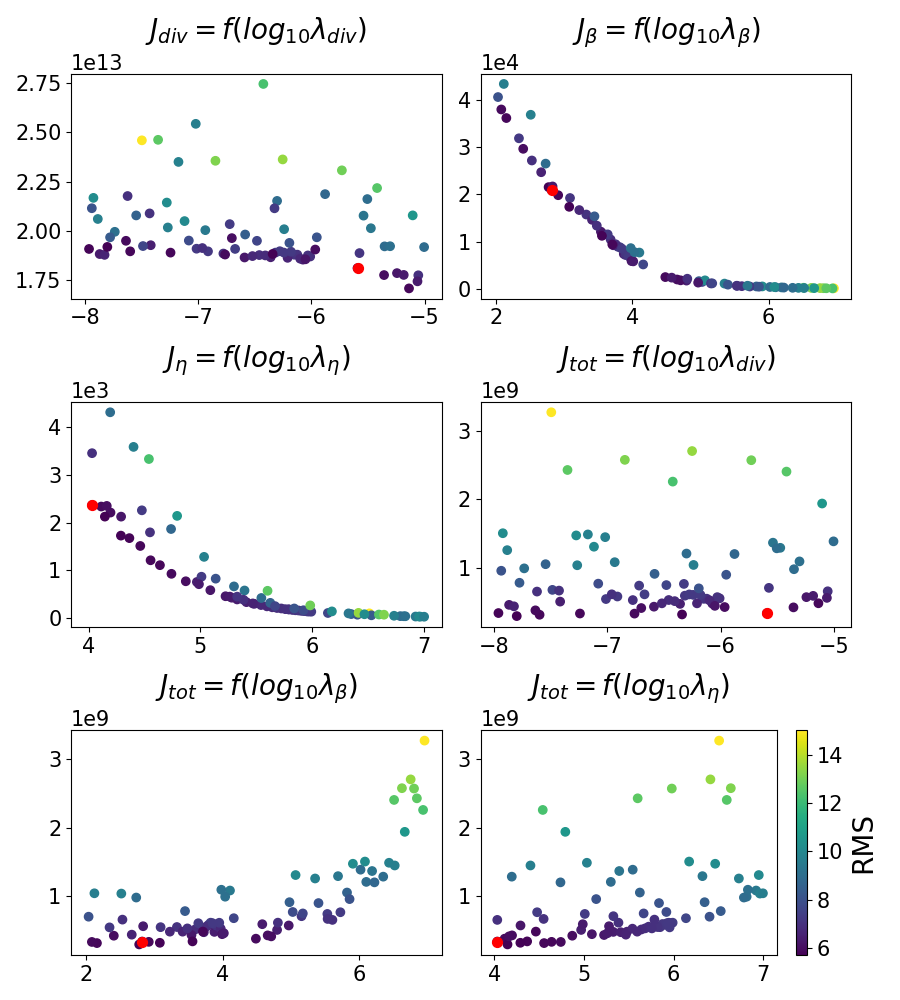

In [3]:
fig,((ax3,ax2),(ax1,ax4),(ax5,ax6))=plt.subplots(3,2,figsize=[9,10])

ax3.scatter(np.log10(lambda1[:,0]),dhdt,c=RMS)
ax3.scatter(np.log10(lambda1[RMS==min(RMS),0]),dhdt[RMS==min(RMS)],s=50,c='r')
ax3.set_title(r'$J_{div}=f(log_{10}\lambda_{div})$')
ax3.ticklabel_format(axis='both',style='sci',scilimits=(0,2))

ax2.scatter(np.log10(lambda1[:,1]),beta,c=RMS)
ax2.scatter(np.log10(lambda1[RMS==min(RMS),1]),beta[RMS==min(RMS)],s=50,c='r')
ax2.set_title(r'$J_\beta=f(log_{10}\lambda_\beta)$')
ax2.ticklabel_format(axis='both',style='sci',scilimits=(0,2))

img=ax1.scatter(np.log10(lambda1[:,2]),eta,c=RMS)
ax1.scatter(np.log10(lambda1[RMS==min(RMS),2]),eta[RMS==min(RMS)],s=50,c='r')
ax1.set_title(r'$J_\eta =f(log_{10}\lambda_\eta)$')
ax1.ticklabel_format(axis='both',style='sci',scilimits=(0,2))



ax4.scatter(np.log10(lambda1[:,0]),Jtot,c=RMS)
ax4.scatter(np.log10(lambda1[RMS==min(RMS),0]),Jtot[RMS==min(RMS)],s=50,c='r')
ax4.set_title(r'$J_{tot}=f(log_{10}\lambda_{div})$')
ax4.ticklabel_format(axis='both',style='sci',scilimits=(0,2))

ax5.scatter(np.log10(lambda1[:,1]),Jtot,c=RMS)
ax5.scatter(np.log10(lambda1[RMS==min(RMS),1]),Jtot[RMS==min(RMS)],s=50,c='r')
ax5.set_title(r'$J_{tot}=f(log_{10}\lambda_\beta)$')
ax5.ticklabel_format(axis='both',style='sci',scilimits=(0,2))

ax6.scatter(np.log10(lambda1[:,2]),Jtot,c=RMS)
ax6.scatter(np.log10(lambda1[RMS==min(RMS),2]),Jtot[RMS==min(RMS)],s=50,c='r')
ax6.set_title(r'$J_{tot} =f(log_{10}\lambda_\eta)$')
ax6.ticklabel_format(axis='both',style='sci',scilimits=(0,2))


cb=fig.colorbar(img)
cb.set_label('RMS')


plt.tight_layout()

Je représente ici les paramètres de régularisation en fonction de la RMS. On observe une relation exponentielle entre la RMS et le parametre de regularisation $\lambda_\eta$.

Pour $\lambda_\beta$ et $\lambda_{div}$ aucune relation directe n'est observé

<IPython.core.display.Javascript object>


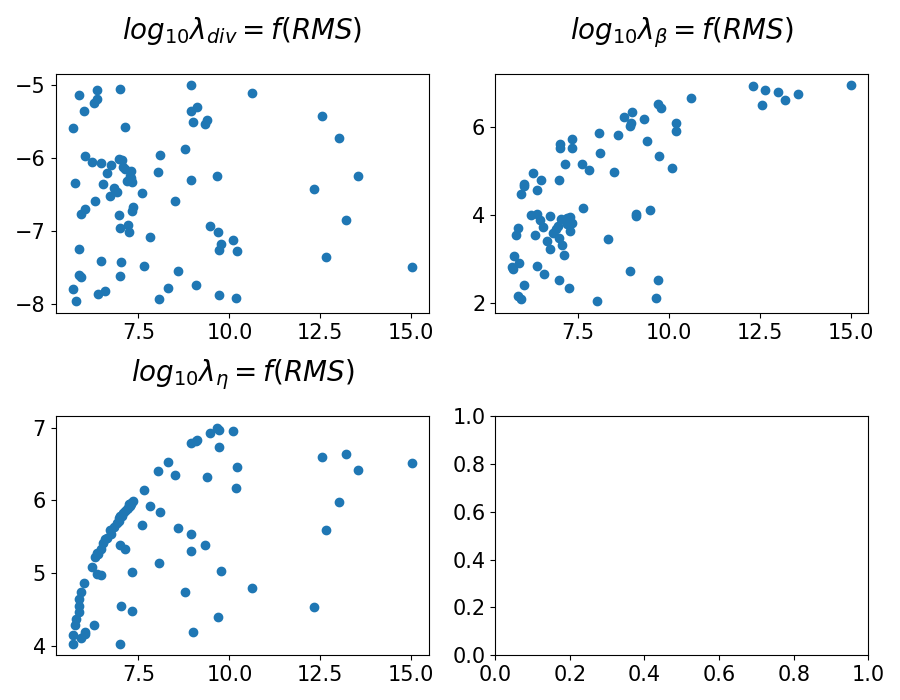

In [4]:
fig,((ax1,ax2),(ax3,ax4))=plt.subplots(2,2,figsize=[9,7])
img=ax1.scatter(RMS,np.log10(lambda1[:,0]))
ax1.set_title(r'$log_{10} \lambda_{div}=f(RMS)$')
ax1.ticklabel_format(axis='both',style='sci',scilimits=(0,2))
# ax1.set_ylim(1.0E-05, 1.0E-08)

img=ax2.scatter(RMS,np.log10(lambda1[:,1]))
ax2.set_title(r'$log_{10} \lambda_{\beta}=f(RMS)$')
# ax2.set_ylim(1.0E2,1.0E5)
ax2.ticklabel_format(axis='both',style='sci',scilimits=(0,2))
ax3.scatter(RMS,np.log10(lambda1[:,2]))
ax3.set_title(r'$log_{10} \lambda_{\eta}=f(RMS)$')
# ax3.set_ylim(1.0e4, 1.0e7)
ax3.ticklabel_format(axis='both',style='sci',scilimits=(0,2))


plt.tight_layout()

In [32]:
min(RMS)

5.6968115

La représentation en 3 dimensions permet d'observer pour quel trio de paramètres notre RMS est la plus faible.

<IPython.core.display.Javascript object>


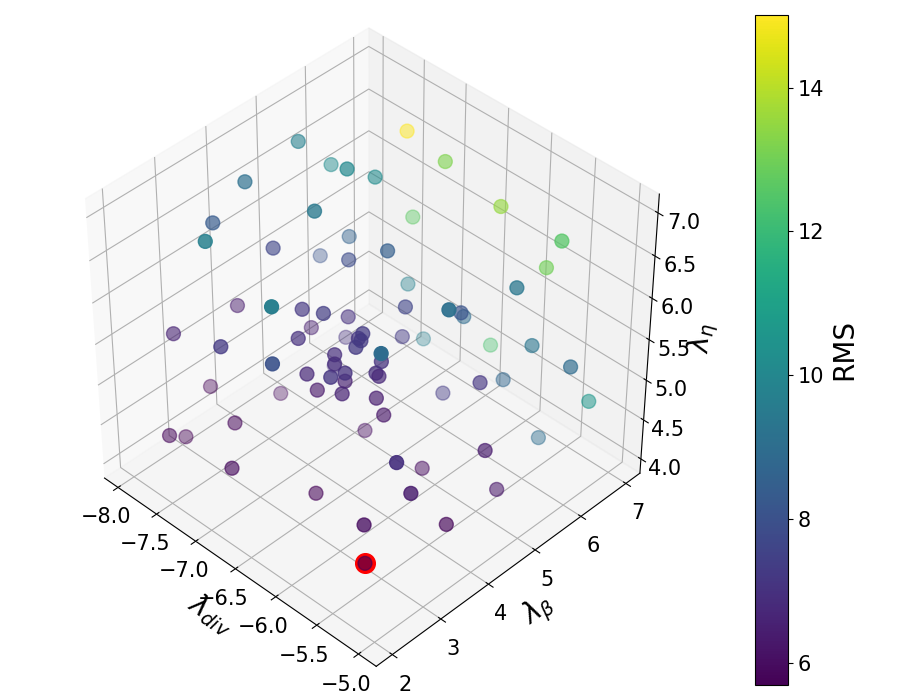

In [33]:

fig = plt.figure(figsize=[9,7])
ax = fig.add_subplot(111, projection='3d')
img=ax.scatter(np.log10(lambda1[:,0]),np.log10(lambda1[:,1]),np.log10(lambda1[:,2]),s=100,c=RMS)
ax.scatter(np.log10(lambda1[RMS==min(RMS),0]),np.log10(lambda1[RMS==min(RMS),1]),np.log10(lambda1[RMS==min(RMS),2]),s=200,c='r')
# img=ax.scatter(RMS,lambda1[:,0],lambda1[:,1],s=100,c=RMS)

# ax.plot(lambda1[:,0],lambda1[:,1],lambda1[:,2])
# ax.set_xlim(1.0E-06, 1.0E-07)
# ax.set_ylim(1.0E3, 1.0E4)
# ax.set_zlim(1.0e5, 1.0e6)
ax.set_xlabel('$\lambda_{div}$')

ax.set_ylabel(r'$\lambda_{\beta}$')
ax.set_zlabel(r'$\lambda_{\eta}$')
ax.ticklabel_format(axis='both',style='sci',scilimits=(0,2))
cb=fig.colorbar(img)
cb.set_label('RMS')
plt.tight_layout()

J'ai extrapolé les valeurs ci-dessus sur une grille de 20x20x20 pour faire une représentation de l'espace et choisir les paramètres.

Generate new grid...
time needed:  0.0058350000000046975  seconds

Interpolate...
time needed:  0.0143589999999989  seconds



/home/urrutyb/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/home/urrutyb/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/home/urrutyb/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/home/urrutyb/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


<IPython.core.display.Javascript object>


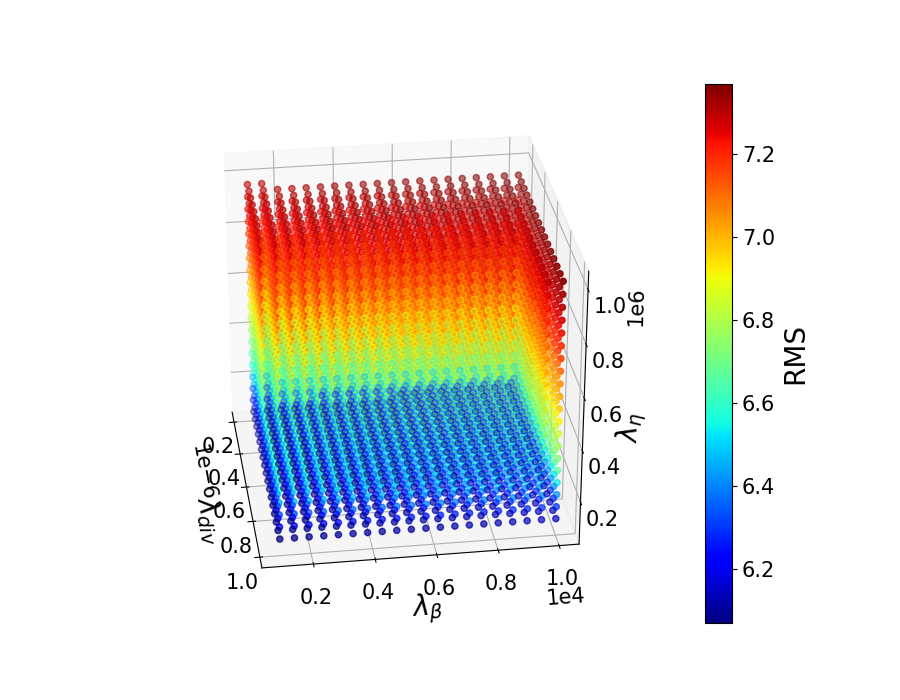

In [34]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.interpolate import griddata as gd
import time

#read values

x = lambda1[:,0]
y = lambda1[:,1]
z = lambda1[:,2]
v = RMS

#generate new grid X,Y,Z
print("Generate new grid...")
start_time=time.clock()
xi,yi,zi=np.ogrid[1e-06:1e-07:20j, 1000.0:10000.0:20j, 100000.0:1000000.0:20j]
X1=xi.reshape(xi.shape[0],)
Y1=yi.reshape(yi.shape[1],)
Z1=zi.reshape(zi.shape[2],)
ar_len=len(X1)*len(Y1)*len(Z1)
X=np.arange(ar_len,dtype=float)
Y=np.arange(ar_len,dtype=float)
Z=np.arange(ar_len,dtype=float)
l=0
for i in range(0,len(X1)):
    for j in range(0,len(Y1)):
        for k in range(0,len(Z1)):
            X[l]=X1[i]
            Y[l]=Y1[j]
            Z[l]=Z1[k]
            l=l+1
print ('time needed: ', time.clock()-start_time, ' seconds')
print("")

#interpolate "data.v" on new grid "X,Y,Z"
print("Interpolate...")
start_time=time.clock()
V = gd((x,y,z), v, (X,Y,Z), method='linear')
print ('time needed: ', time.clock()-start_time, ' seconds')
print("")


#Plot interpolated values
fig2 = plt.figure(figsize=[9,7])
ax2=fig2.gca(projection='3d')
sc2=ax2.scatter(X, Y, Z, c=V, cmap=plt.jet())
cb=plt.colorbar(sc2)
cb.set_label('RMS')
ax2.set_xlabel('$\lambda_{div}$')
ax2.set_ylabel(r'$\lambda_{\beta}$')
ax2.set_zlabel(r'$\lambda_{\eta}$')
ax2.ticklabel_format(axis='both',style='sci',scilimits=(0,2))
plt.tight_layout

#Show plots
plt.show()

## cost

Je choisi maintenant de représenté les valeurs des fonctions côut les unes en fonctions des autres.

[14, 17, 28, 65, 76] 5


<IPython.core.display.Javascript object>


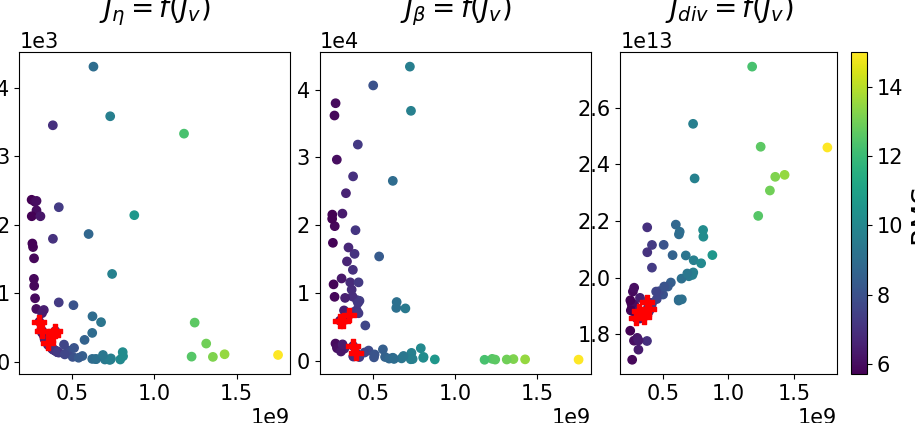

[7.975e-07 9.325e+03 3.475e+05] x= 14
[8.875e-07 9.775e+03 1.225e+05] x= 17
[1.356e-08 1.036e+04 1.827e+05] x= 28
[1.092e-07 6.421e+04 2.426e+05] x= 65
[2.662e-06 1.427e+05 2.129e+05] x= 76


In [24]:
save=[]
for i in range(81):
    if 2.5e8<cost[i]<4e8:
        if eta[i]<0.7e3:
            if beta[i]<0.7e04:
                save.append(i)
                
print(save,len(save))

fig,((ax1,ax2,ax3))=plt.subplots(1,3,figsize=[18,6])
img=ax1.scatter(cost,eta,c=RMS)
# ax1.set_ylim([min(eta)-0.1e-5,max(eta)+0.1e-5])
# ax1.set_xlim([min(beta)-1e-5,max(beta)+1e-5])
cb=fig.colorbar(img,ax=ax3)
cb.set_label('Cost')
ax1.set_title(r'$J_\eta=f(J_v)$')
ax1.ticklabel_format(axis='both',style='sci',scilimits=(0,2))

ax2.scatter(cost,beta,c=RMS)

cb.set_label('RMS')
# ax2.set_ylim([min(beta)-1e-5,max(beta)+1e-5])
ax2.set_title(r'$J_\beta=f(J_{v})$')
# ax2.set_xlim(10,15)
ax2.ticklabel_format(axis='both',style='sci',scilimits=(0,2))


ax3.scatter(cost,dhdt,c=RMS)

ax3.set_title(r'$J_{div}=f(J_{v})$')
# ax3.set_ylim([min(eta)-0.1e-5,max(eta)+0.1e-5])
ax3.ticklabel_format(axis='both',style='sci',scilimits=(0,2))
# ax3.set_ylim([1e-5,3e-5])
# ax3.set_xlim(10,15)

plt.tight_layout()
for x in save:
    ax1.scatter(cost[x],eta[x],c='r',marker="P",s=100)
    ax2.scatter(cost[x],beta[x],c='r',marker="P",s=100)
    ax3.scatter(cost[x],dhdt[x],c='r',marker="P",s=100)
    print(lambda1[x,:],'x=',x)





plt.savefig('/home/urrutyb/Documents/PhD_TiPACCS/inversion/inversion_Ronnie/l-curve/l-curve.pdf')

In [22]:
print(save)

[14, 17, 28, 65, 76]


<IPython.core.display.Javascript object>


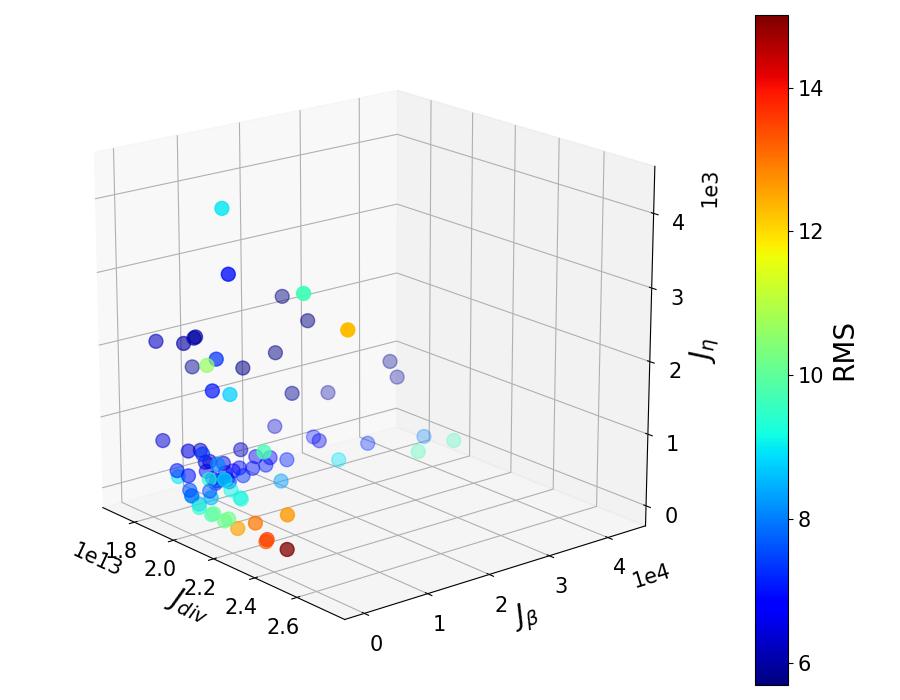

In [42]:
fig = plt.figure(figsize=[9,7])
ax = fig.add_subplot(111, projection='3d')
img=ax.scatter(dhdt,beta,eta,s=100,c=RMS)
# img=ax.scatter(RMS,lambda1[:,0],lambda1[:,1],s=100,c=RMS)

# ax.set_xlim(1.0E-06, 1.0E-07)
# ax.set_ylim(1.0E3, 1.0E4)
# ax.set_zlim(1.0e5, 1.0e6)
# ax.set_xlim(10,15)

ax.set_xlabel('$J_{div}$')

ax.set_ylabel(r'$J_\beta$')
ax.set_zlabel(r'$J_\eta$')
ax.ticklabel_format(axis='both',style='sci',scilimits=(0,2))
cb=fig.colorbar(img)
cb.set_label('RMS')
plt.tight_layout()

In [12]:
x

array([7.07500000e-07, 1.22500000e-07, 2.12500000e-07, 9.77500000e-07,
       3.47500000e-07, 8.42500000e-07, 9.32500000e-07, 4.82500000e-07,
       4.37500000e-07, 7.52500000e-07, 3.92500000e-07, 2.57500000e-07,
       6.17500000e-07, 3.02500000e-07, 7.97500000e-07, 5.27500000e-07,
       1.67500000e-07, 8.87500000e-07, 5.72500000e-07, 6.62500000e-07,
       5.72223526e-08, 1.09207624e-08, 2.52019239e-08, 4.38538165e-06,
       1.16042602e-07, 8.79311898e-06, 1.08307993e-06, 1.73412810e-07,
       1.35630556e-08, 5.41436754e-08, 4.55567975e-07, 6.40401602e-07,
       1.49706583e-08, 2.55562919e-06, 2.31425688e-08, 2.60580866e-07,
       9.70838441e-08, 1.84334523e-08, 3.82648474e-08, 7.28013770e-06])

Generate new grid...
time needed:  0.019175999999959004  seconds

Interpolate...
time needed:  0.008878999999978987  seconds



/home/urrutyb/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/home/urrutyb/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/home/urrutyb/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/home/urrutyb/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


<IPython.core.display.Javascript object>


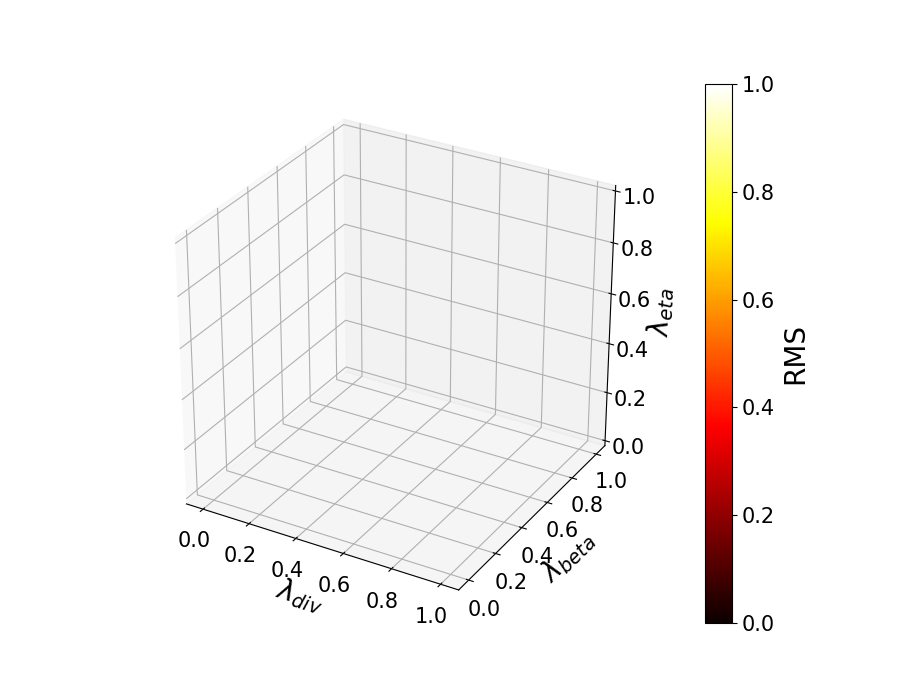

In [43]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.interpolate import griddata as gd
import time

#read values

x = dhdt*1e-13
y = eta*1e-3
z = beta*1e-5
v = cost*1e-8

#generate new grid X,Y,Z
print("Generate new grid...")
start_time=time.clock()
xi,yi,zi=np.ogrid[1.0:10.0:21j, 0:10:21j, 0:10:21j] #a modifier
X1=xi.reshape(xi.shape[0],)
Y1=yi.reshape(yi.shape[1],)
Z1=zi.reshape(zi.shape[2],)
ar_len=len(X1)*len(Y1)*len(Z1)
X=np.arange(ar_len,dtype=float)
Y=np.arange(ar_len,dtype=float)
Z=np.arange(ar_len,dtype=float)
l=0
for i in range(0,len(X1)):
    for j in range(0,len(Y1)):
        for k in range(0,len(Z1)):
            X[l]=X1[i]
            Y[l]=Y1[j]
            Z[l]=Z1[k]
            l=l+1
print ('time needed: ', time.clock()-start_time, ' seconds')
print("")

#interpolate "data.v" on new grid "X,Y,Z"
print("Interpolate...")
start_time=time.clock()
V = gd((x,y,z), v, (X,Y,Z), method='linear')
print ('time needed: ', time.clock()-start_time, ' seconds')
print("")


#Plot interpolated values
fig2 = plt.figure(figsize=[9,7])
ax2=fig2.gca(projection='3d')
sc2=ax2.scatter(X, Y, Z, c=V, cmap=plt.hot())
cb=plt.colorbar(sc2)
cb.set_label('RMS')
ax2.set_xlabel('$\lambda_{div}$')
ax2.set_ylabel('$\lambda_{beta}$')
ax2.set_zlabel('$\lambda_{eta}$')
ax2.ticklabel_format(axis='both',style='sci',scilimits=(0,2))
plt.tight_layout

#Show plots
plt.show()